In [371]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [6, 4]

## grid search

### EJ1

Estamos interesados en la proporción de éxito 𝜃 de una distribución Bernoulli. Tenemos una
muestra observada que consiste en el número de éxitos en 30 ensayos independientes y con idéntica distribución de una Bernoulli con parámetro 𝜃; en esta muestra hay precisamente 19 éxitos.

(a) Definir una grilla de posibles valores para 𝜃.

(b) Calcular la verosimilitud, o likelihood, para cada valor de la grilla.

(c) Suponiendo una prior uniforme sobre 𝜃, calcular la distribución posterior no normalizada y
luego normalizar.

(d) Graficar la distribución posterior obtenida y comparar con la distribución posterior teórica,
que es una Beta.

(e) Samplear y dar el 90% HPDI de la posterior y de la posterior predictive.

(f ) Calcular para cada 𝑘 la probabilidad de obtener 𝑘 éxitos en 10 experimentos con la posterior
predictive. ¿Se trata ésta de una distribución binomial?



<Axes: >

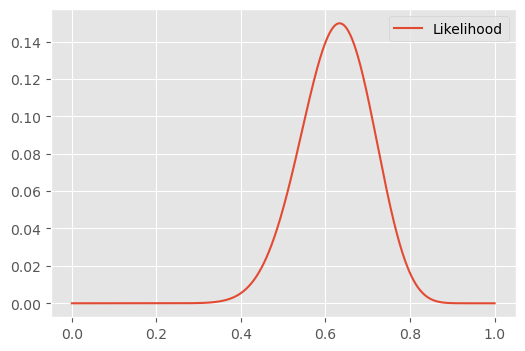

In [372]:
# a theta entre 0 y 1.
theta_grid = np.linspace(0, 1, 1000)
# b calcular likelihood  -> evidencia 16 exitos de 30 intentos. distribucion es binomial.
sample_size = 30
successes = 19

P_sample = successes / sample_size

ll = st.binom.pmf(k=successes, n=sample_size, p=theta_grid)
sns.lineplot(x=theta_grid, y=ll, label="Likelihood")

<Axes: >

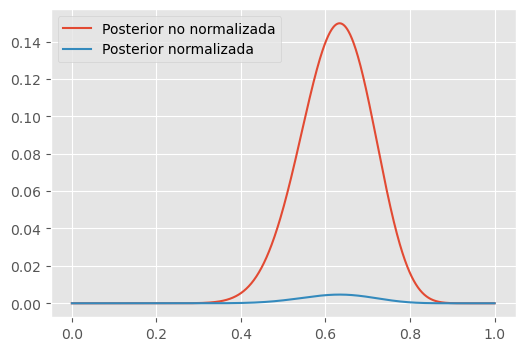

In [373]:
# c con prior uniforme calcular posterior no normalizada

prior = st.uniform(0, 1).pdf(theta_grid)

posterior = ll * prior

sns.lineplot(x=theta_grid, y=posterior, label="Posterior no normalizada")

normalized_posterior = posterior / np.sum(posterior)

sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")

<Axes: >

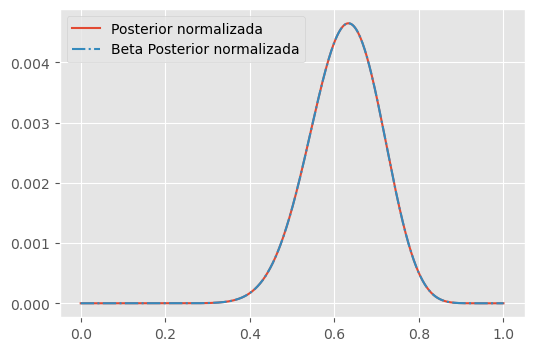

In [374]:
# d
sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")

beta_posterior = st.beta(a=successes + 1, b=sample_size - successes + 1).pdf(theta_grid)
beta_posterior_normalized = beta_posterior / np.sum(beta_posterior)


sns.lineplot(
    x=theta_grid,
    y=beta_posterior_normalized,
    label="Beta Posterior normalizada",
    linestyle="-.",
)

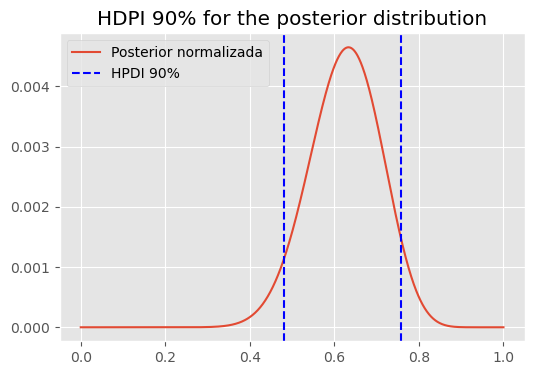

In [375]:
# e) 90% HPDI


def HPDI(posterior, theta_grid, alpha=0.05):
    posterior = posterior / np.sum(posterior)
    posterior = pd.Series(posterior, index=theta_grid)
    posterior = posterior.cumsum()
    lower = posterior[posterior <= alpha / 2].index.max()
    upper = posterior[posterior >= 1 - alpha / 2].index.min()
    return lower, upper


lower, upper = HPDI(normalized_posterior, theta_grid, 0.1)

sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")
plt.axvline(lower, color="b", linestyle="--", label="HPDI 90%")
plt.axvline(upper, color="b", linestyle="--")
plt.title("HDPI 90% for the posterior distribution")
plt.legend()

0 0.3750000000000001
1 0.6250000000000003


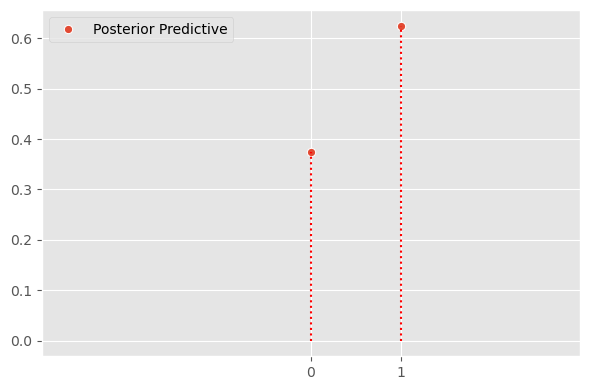

In [376]:
sampling_values = [0, 1]
posterior_predictive = []
for k in sampling_values:
    sampling_distribution = st.bernoulli.pmf(k=k, p=theta_grid)
    posterior_predictive.append(sum(sampling_distribution * normalized_posterior))


sns.lineplot(
    x=sampling_values,
    y=posterior_predictive,
    label="Posterior Predictive",
    marker="o",
    linestyle="",
)

for x, y in zip(sampling_values, posterior_predictive):
    print(x, y)
    plt.vlines(x, 0, y, colors="r", linestyles="dotted")

plt.xticks([0, 1])
plt.xlim((-3, 3))
plt.tight_layout()

<Axes: >

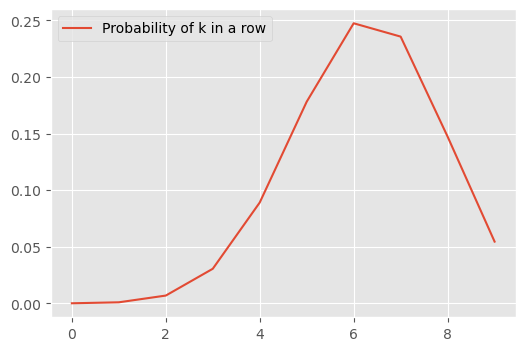

In [377]:
t = range(0, 10)
k_in_a_row = st.binom.pmf(k=t, n=10, p=posterior_predictive[1])

sns.lineplot(x=t, y=k_in_a_row, label="Probability of k in a row")

### EJ2

idem EJ1 con un prior uniforme en 0-0.5 con peso 0.3 y en 0.5-1 con peso 0.7

<Axes: >

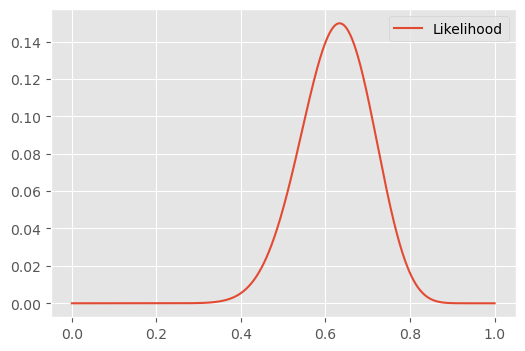

In [378]:
# a theta entre 0 y 1.
grid_size = 1000
theta_grid = np.linspace(0, 1, grid_size)
# b calcular likelihood  -> evidencia 16 exitos de 30 intentos. distribucion es binomial.
sample_size = 30
successes = 19

P_sample = successes / sample_size

ll = st.binom.pmf(k=successes, n=sample_size, p=theta_grid)
sns.lineplot(x=theta_grid, y=ll, label="Likelihood")

<Axes: >

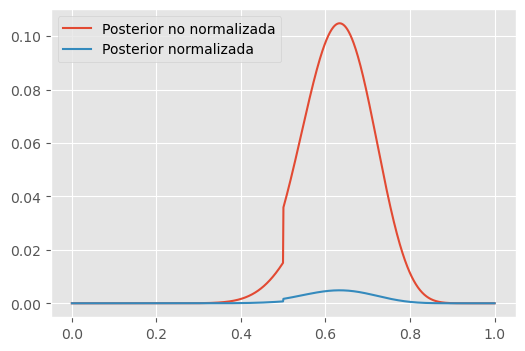

In [379]:
# c uniforme en [0, 0.5] con peso 0.3 y otra uniforme en [0.5, 1] con peso 0.7

prior = np.concatenate(
    (np.ones(int(grid_size / 2)) * 0.3, np.ones(int(grid_size / 2)) * 0.7)
)

posterior = ll * prior

sns.lineplot(x=theta_grid, y=posterior, label="Posterior no normalizada")

normalized_posterior = posterior / np.sum(posterior)

sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")

<Axes: >

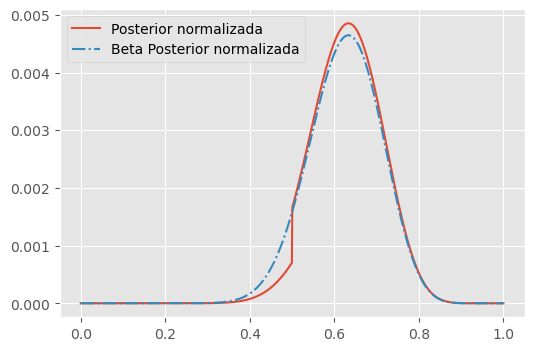

In [380]:
# d
sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")

beta_posterior = st.beta(a=successes + 1, b=sample_size - successes + 1).pdf(theta_grid)
beta_posterior_normalized = beta_posterior / np.sum(beta_posterior)


sns.lineplot(
    x=theta_grid,
    y=beta_posterior_normalized,
    label="Beta Posterior normalizada",
    linestyle="-.",
)

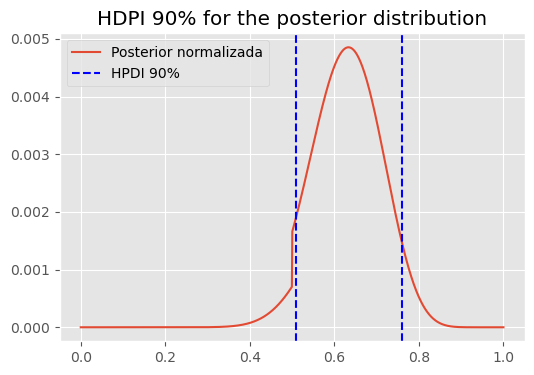

In [381]:
# e) 90% HPDI
def HPDI(posterior, theta_grid, alpha=0.05):
    posterior = posterior / np.sum(posterior)
    posterior = pd.Series(posterior, index=theta_grid)
    posterior = posterior.cumsum()
    lower = posterior[posterior <= alpha / 2].index.max()
    upper = posterior[posterior >= 1 - alpha / 2].index.min()
    return lower, upper


lower, upper = HPDI(normalized_posterior, theta_grid, 0.1)

sns.lineplot(x=theta_grid, y=normalized_posterior, label="Posterior normalizada")
plt.axvline(lower, color="b", linestyle="--", label="HPDI 90%")
plt.axvline(upper, color="b", linestyle="--")
plt.title("HDPI 90% for the posterior distribution")
plt.legend()

0 0.36764480842862207
1 0.6323551915713783


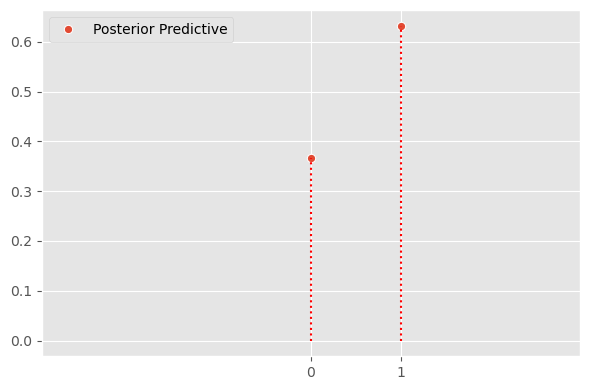

In [382]:
sampling_values = [0, 1]
posterior_predictive = []
for k in sampling_values:
    sampling_distribution = st.bernoulli.pmf(k=k, p=theta_grid)
    posterior_predictive.append(sum(sampling_distribution * normalized_posterior))


sns.lineplot(
    x=sampling_values,
    y=posterior_predictive,
    label="Posterior Predictive",
    marker="o",
    linestyle="",
)

for x, y in zip(sampling_values, posterior_predictive):
    print(x, y)
    plt.vlines(x, 0, y, colors="r", linestyles="dotted")

plt.xticks([0, 1])
plt.xlim((-3, 3))
plt.tight_layout()

<Axes: >

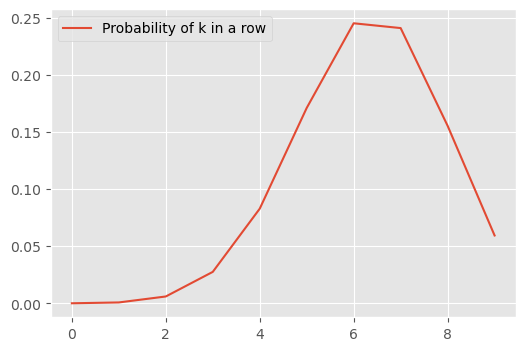

In [383]:
t = range(0, 10)
k_in_a_row = st.binom.pmf(k=t, n=10, p=posterior_predictive[1])

sns.lineplot(x=t, y=k_in_a_row, label="Probability of k in a row")

### EJ3

Value for max PP : 0.555


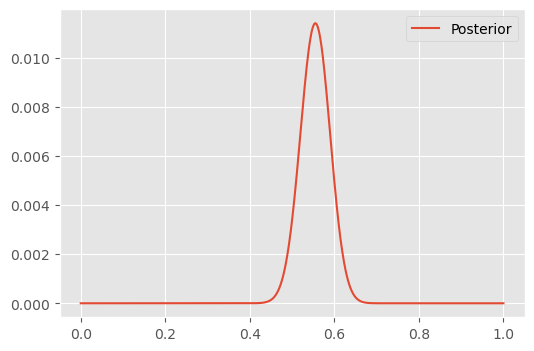

In [384]:
theta_grid = np.linspace(0, 1, 1000)
prior = st.uniform(0, 1).pdf(theta_grid)

male, female = 111, 89
sample_size = male + female

ll = st.binom.pmf(p=theta_grid, n=sample_size, k=male)

posterior = ll * prior / np.sum(ll * prior)

sns.lineplot(x=theta_grid, y=posterior, label="Posterior")
print(f"Value for max PP : {theta_grid[np.argmax(posterior)]:.3f}")

In [385]:
for coverage in [0.5, 0.89, 0.97]:
    lower, upper = HPDI(posterior, theta_grid, 1 - coverage)
    print(f"HPDI {coverage}: [{lower:.3f}, {upper:.3f}]")

HPDI 0.5: [0.530, 0.579]
HPDI 0.89: [0.497, 0.610]
HPDI 0.97: [0.477, 0.630]


Value for max predictive PP : 111


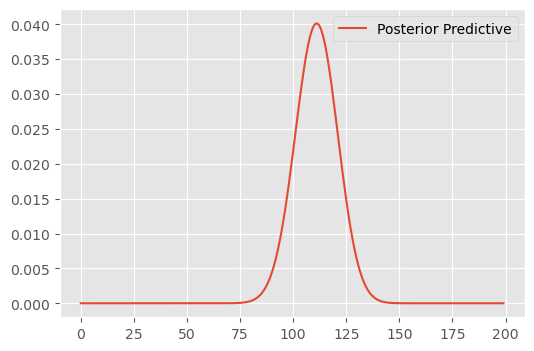

In [386]:
sampling_values = np.arange(0, 200)
posterior_predictive = []

for k in sampling_values:
    sampling_distribution = st.binom.pmf(k=k, n=sample_size, p=theta_grid)
    posterior_predictive.append(sum(sampling_distribution * posterior))

sns.lineplot(x=sampling_values, y=posterior_predictive, label="Posterior Predictive")
print(
    f"Value for max predictive PP : {sampling_values[np.argmax(posterior_predictive)]}"
)

<Axes: ylabel='Count'>

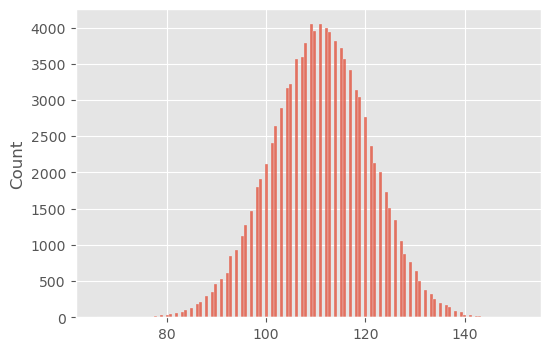

In [387]:
sex_ratio_sampling = np.random.choice(
    sampling_values, p=posterior_predictive, size=100000
)

sns.histplot(
    sex_ratio_sampling
)  ## ya hice la posterior predictiva que me da la misma informacion

### EJ4

5 percentile: 147.0
25 percentile: 158.0
50 percentile: 166.0
75 percentile: 174.0
95 percentile: 186.0


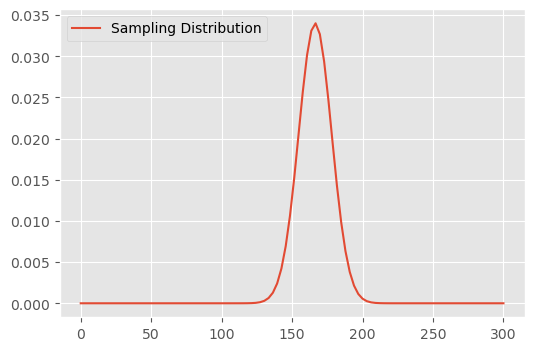

In [388]:
# Y ~ cantidad de "6" que sale en 1000 tiradas de un dado equilibrado

samples = np.array(
    [np.random.randint(1, 7, 1000).tolist().count(6) for _ in range(5000)]
)

sampling_distribution = st.norm(loc=np.mean(samples), scale=np.std(samples))

sns.lineplot(
    x=np.linspace(0, 300, 100),
    y=sampling_distribution.pdf(np.linspace(0, 300, 100)),
    label="Sampling Distribution",
)

for percentile in [5, 25, 50, 75, 95]:
    print(f"{percentile} percentile: {np.percentile(samples, percentile)}")

### EJ5

5 percentile: 76.0
25 percentile: 134.0
50 percentile: 167.0
75 percentile: 211.0
95 percentile: 261.0


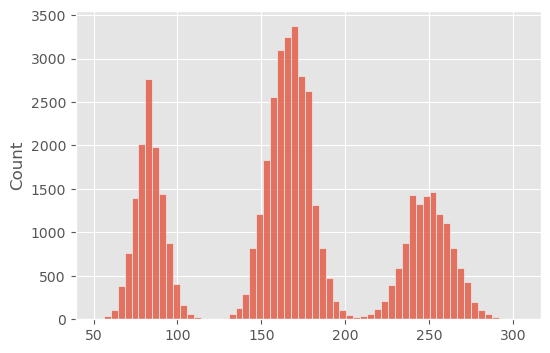

In [389]:
# dado no necesariamente equilibrado, theta es la probabilidad de sacar 6

theta_prior_sample = np.random.choice(
    [1 / 12, 1 / 6, 1 / 4], p=[0.25, 0.5, 0.25], size=50000
)
y_prior_samples = st.binom(p=theta_prior_sample, n=1000).rvs()
sns.histplot(y_prior_samples)

for percentile in [5, 25, 50, 75, 95]:
    print(f"{percentile} percentile: {np.percentile(y_prior_samples, percentile)}")

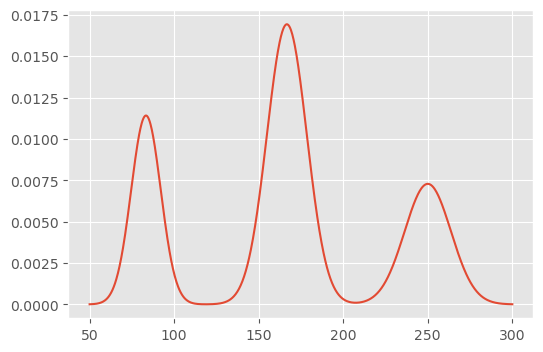

In [390]:
### OTRA MANERA DE HACERLO --> uso de la distribucion normal, la integral de P(y) = P(y|theta)P(theta) dtheta = sum(P(y|theta)P(theta))

n = 1000
x = np.linspace(50, 300, 1000)

prior_12 = 0.25
prior_6 = 0.5
prior_4 = 0.25

p = 1 / 12
L_12 = st.norm.pdf(x, loc=n * p, scale=np.sqrt(n * p * (1 - p)))
p = 1 / 6
L_6 = st.norm.pdf(x, loc=n * p, scale=np.sqrt(n * p * (1 - p)))
p = 1 / 4
L_4 = st.norm.pdf(x, loc=n * p, scale=np.sqrt(n * p * (1 - p)))

p_y = L_12 * prior_12 + L_6 * prior_6 + L_4 * prior_4


plt.plot(x, p_y)

### EJ6

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -203.51249286154354
        x: [ 4.615e-01]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 1.911e-02]]
     nfev: 8
     njev: 4
Posterior mode: 0.462
Information matrix: 39.4716552693114
Standard deviation approx: 0.159


<Axes: >

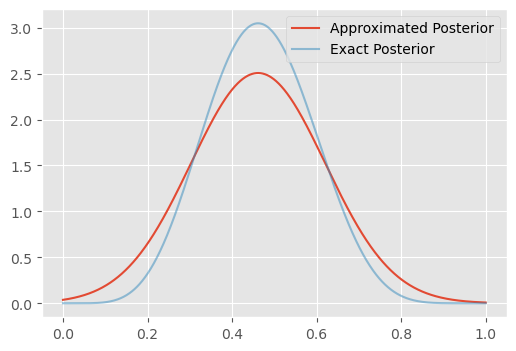

In [391]:
# theta = prob de cara
from scipy.special import comb

theta_grid = np.linspace(0, 1, 1000)
prior = st.beta(a=3, b=2)

caras, monedas = 4, 10


def neg_log_posterior_binomial(theta, y, n):  # n conocido y fijo.

    log_likelihood = np.sum(
        comb(N=n, k=y) + y * np.log(theta) + (n - y) * np.log(1 - theta)
    )

    log_prior = np.log(st.beta(a=3, b=2).pdf(theta))

    return -(log_likelihood + log_prior)


def log_posterior_binomial_second_derivative(theta, y, n):
    return np.sum(((2 * theta - 1) * y - n * theta**2) / (theta * (theta - 1)) ** 2)


res = minimize(neg_log_posterior_binomial, 0.46, args=(caras, monedas))
posterior_mode = res.x[0]

print(res)

I = -log_posterior_binomial_second_derivative(posterior_mode, caras, monedas)
std_approx = np.sqrt(1 / I)

print(f"Posterior mode: {posterior_mode:.3f}")
print(f"Information matrix: {I}")
print(f"Standard deviation approx: {std_approx:.3f}")

approximated_posterior = st.norm(loc=posterior_mode, scale=std_approx).pdf(theta_grid)
sns.lineplot(x=theta_grid, y=approximated_posterior, label="Approximated Posterior")

exact_posterior = st.beta(a=caras + 3, b=monedas - caras + 2).pdf(theta_grid)
sns.lineplot(x=theta_grid, y=exact_posterior, label="Exact Posterior", alpha=0.5)

### EJ 7

In [392]:
## con priors uniformes
## ver ecuacion en pag 94 libro BDA3

y = st.norm.rvs(loc=0.5, scale=0.1, size=100)


def neg_log_likelihood_gaussian(params, y):
    mu, sigma = params
    mean = np.mean(y)
    n = len(y)
    s2 = np.var(y)
    ll = -np.log(sigma) - (1 / (2 * sigma**2)) * ((n - 1) * s2 + n * (mean - mu) ** 2)
    return -ll


res = minimize(neg_log_likelihood_gaussian, [y.mean(), y.std()], args=(y))
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.5323802268903247
        x: [ 4.985e-01  1.033e+00]
      nit: 9
      jac: [ 7.331e-06  6.706e-08]
 hess_inv: [[ 1.206e-02  5.696e-04]
            [ 5.696e-04  5.339e-01]]
     nfev: 42
     njev: 14


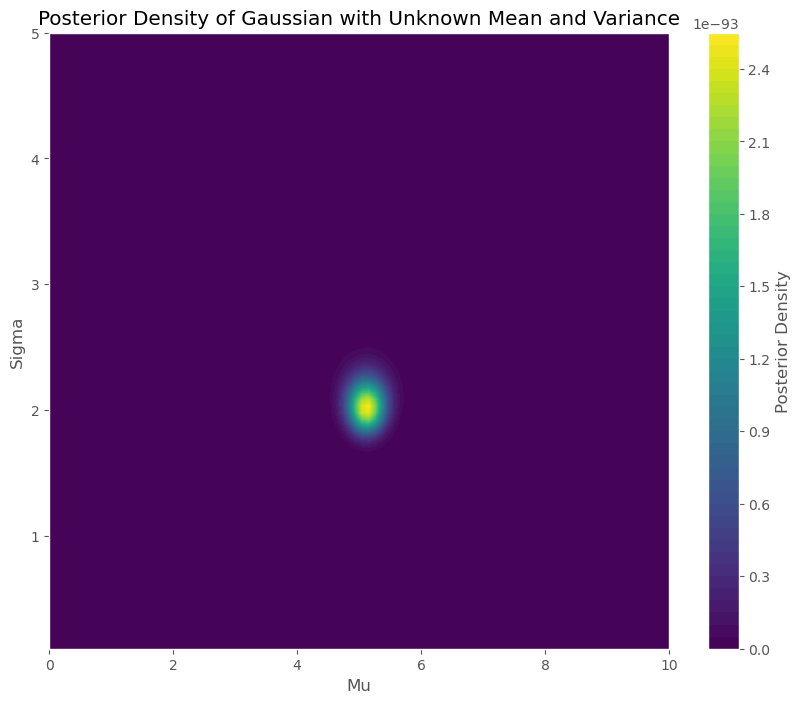

In [400]:
def posterior_density_gaussian(x, mu_range, sigma_range):
    """
    Compute the posterior density for a Gaussian distribution with unknown mean and variance
    with a flat prior for mu and log(sigma).

    Parameters:
    - x: array-like, shape (n,)
        Observed data points.
    - mu_range: array-like, shape (m,)
        Range of mu values.
    - sigma_range: array-like, shape (s,)
        Range of sigma values.

    Returns:
    - posterior: 2D array, shape (m, s)
        Posterior density values for each combination of mu and sigma.
    """
    n = len(x)
    mean_x = np.mean(x)
    var_x = np.var(x, ddof=1)  # sample variance

    N = len(mu_range)
    M = len(sigma_range)

    posterior = np.zeros((N, M))

    for i, mu in enumerate(mu_range):
        for j, sigma in enumerate(sigma_range):
            if sigma <= 0:
                posterior[i, j] = 0
            else:
                exponent = -0.5 * n * (var_x + (mean_x - mu) ** 2) / (sigma**2)
                prior = 1 / sigma
                likelihood = (1 / (sigma * np.sqrt(2 * np.pi))) ** n * np.exp(exponent)
                posterior[i, j] = likelihood * prior

    return posterior


# Example usage
np.random.seed(0)
x = np.random.normal(loc=5, scale=2, size=100)  # Sample data
mu_range = np.linspace(0, 10, 100)  # Range of mu values
sigma_range = np.linspace(0.1, 5, 100)  # Range of sigma values

posterior = posterior_density_gaussian(x, mu_range, sigma_range)

# Plotting the result
plt.figure(figsize=(10, 8))
X, Y = np.meshgrid(mu_range, sigma_range)
plt.contourf(X, Y, posterior.T, levels=50, cmap="viridis")
plt.colorbar(label="Posterior Density")
plt.title("Posterior Density of Gaussian with Unknown Mean and Variance")
plt.xlabel("Mu")
plt.ylabel("Sigma")
plt.show()

### EJ8

Text(0.5, 0, 'Theta')

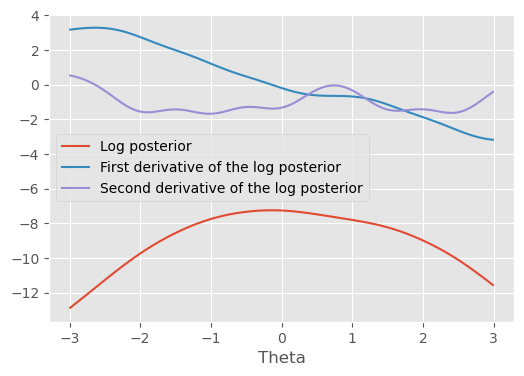

In [418]:
def neg_log_cauchy_posterior(theta, y):  # cauchy with center theta
    if theta < -3 or theta > 3:
        return np.inf
    log_posterior = np.sum(np.log(1 / (1 + (y - theta) ** 2)))
    log_prior = np.log(1 / 6)
    return -(log_posterior + log_prior)


def log_cauchy_posterior_deriv(theta, y):
    if theta < -3 or theta > 3:
        return np.inf
    log_posterior = np.sum(2 * (y - theta) / ((y - theta) ** 2 + 1))
    return log_posterior


def log_cauchy_posterior_second_deriv(theta, y):
    if theta < -3 or theta > 3:
        return np.inf
    log_posterior = np.sum((2 * ((y - theta) ** 2 - 1)) / (((y - theta) ** 2 + 1) ** 2))
    return log_posterior


y = np.array([-2, -1, 0, 1.5, 2.5])

theta_grid = np.linspace(-5, 5, 200)

sns.lineplot(
    x=theta_grid,
    y=[-neg_log_cauchy_posterior(theta, y) for theta in theta_grid],
    label="Log posterior",
)
sns.lineplot(
    x=theta_grid,
    y=[log_cauchy_posterior_deriv(theta, y) for theta in theta_grid],
    label="First derivative of the log posterior",
)
sns.lineplot(
    x=theta_grid,
    y=[log_cauchy_posterior_second_deriv(theta, y) for theta in theta_grid],
    label="Second derivative of the log posterior",
)
plt.xlabel("Theta")

In [421]:
res = minimize(neg_log_cauchy_posterior, y.mean(), args=(y))
res

posterior_mode = res.x[0]

I = -log_cauchy_posterior_second_deriv(posterior_mode, y)
std_approx = np.sqrt(1 / I)

print(f"Posterior mode: {posterior_mode:.3f}")
print(f"Information matrix: {I}")
print(f"Standard deviation approx: {std_approx:.3f}")

Posterior mode: -0.138
Information matrix: 1.374890005189048
Standard deviation approx: 0.853
